## Variance for Preferred Number of Clusters

In this notebook, we conduct the sensitivity analysis for our `infomap` input parameter, the preferred number of clusters,
as reported in the SI.

In short, we investigate the question:
How do the clusterings differ if we vary the preferred number of clusters?

### Preparations

In [1]:
from cdlib import evaluation, readwrite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16

In [3]:
def make_dfs(dataset, preferred_cluster_sizes, years, config_strs):
    dfs = []
    for year in years:
        config_str = config_strs[0]
        ref_clustering = readwrite.read_community_json(
                f'../../legal-networks-data/{dataset.lower()}/11_cluster_results/{year}_0-0_1-0_-1_a-infomap_n100_m1-0_s0_c1000.json'
            )
        clusterings = [
            readwrite.read_community_json(
                f'../../legal-networks-data/{dataset.lower()}/11_cluster_results/{year}_{config_str}.json'
            )
            for config_str in config_strs
        ]
        df = pd.DataFrame(
            {
                'Preferred Clusters': p,
                'NMI': evaluation.normalized_mutual_information(ref_clustering, c).score,
                'Rand': evaluation.adjusted_rand_index(ref_clustering, c).score,
                "Year": year
            }
            for p, c in zip(preferred_cluster_sizes, clusterings)
        )
        dfs.append(df)
    return dfs

In [4]:
def make_boxplot(dfs, pivot_col, y_label, save_path=None):
    pd.concat(dfs).pivot(columns='Preferred Clusters', index='Year', values=pivot_col
                    ).boxplot(notch=0, sym="",color=dict(boxes='k', whiskers='k', medians='r', caps='k'))
    plt.ylabel(y_label, fontsize=20)
    plt.xlabel('Preferred Number of Clusters', fontsize=20)
    labels = plt.gca().get_xticklabels()
    labels[0] = 'auto'
    plt.gca().set_xticklabels(labels)
    if pivot_col == 'Rand':
        plt.yticks(np.arange(0,1.2,0.1))
        plt.ylim(0,1.05)
    else:
        plt.yticks(np.arange(0.5,1.05,0.05))
        plt.ylim(0.5,1.05)
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)

### Computing the statistics

#### US

In [5]:
dataset = 'us_reg'
preferred_cluster_sizes = list(range(0,150+1,10)) + [200]
years = range(1998,2019+1)
config_strs = [
    f'0-0_1-0_-1_a-infomap_n{preferred_cluster_size}_m1-0_s0_c1000' 
    if preferred_cluster_size 
    else '0-0_1-0_-1_a-infomap_m1-0_s0_c1000'
    for preferred_cluster_size in preferred_cluster_sizes
]

In [6]:
dfs = make_dfs(dataset, preferred_cluster_sizes, years, config_strs)

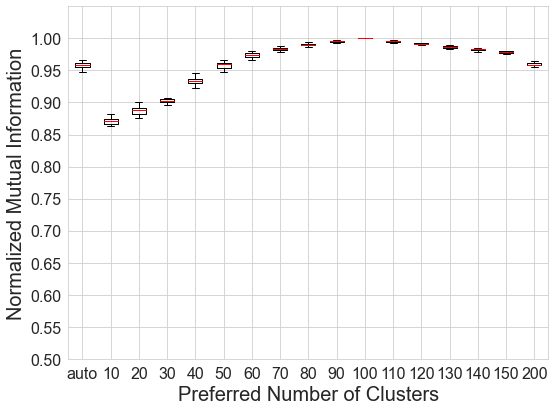

In [7]:
make_boxplot(dfs, 'NMI', 'Normalized Mutual Information', '../graphics/preferred_number_of_modules_nmi_us.pdf')

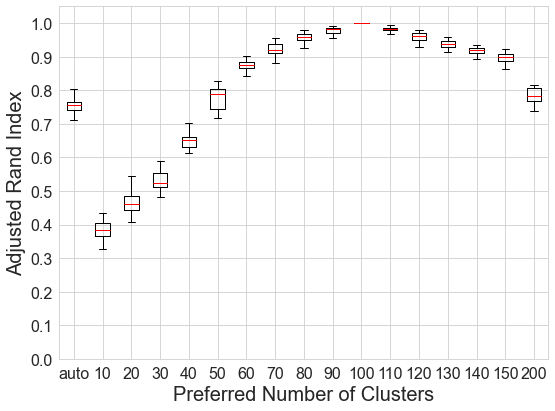

In [8]:
make_boxplot(dfs, 'Rand', 'Adjusted Rand Index', '../graphics/preferred_number_of_modules_rand_us.pdf')

#### DE

In [9]:
dataset = 'de_reg'
preferred_cluster_sizes = list(range(0,150+1,10)) + [200]
years = [f'{year}-12-31' for year in range(1998,2019+1)]
config_strs = [
    f'0-0_1-0_-1_a-infomap_n{preferred_cluster_size}_m1-0_s0_c1000' 
    if preferred_cluster_size 
    else '0-0_1-0_-1_a-infomap_m1-0_s0_c1000'
    for preferred_cluster_size in preferred_cluster_sizes
]

In [10]:
dfs = make_dfs(dataset, preferred_cluster_sizes, years, config_strs)

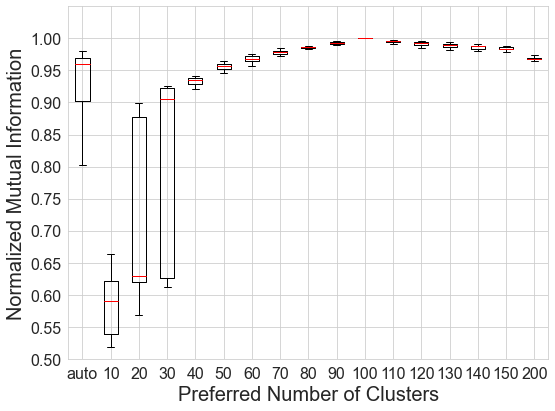

In [11]:
make_boxplot(dfs, 'NMI', 'Normalized Mutual Information', '../graphics/preferred_number_of_modules_nmi_de.pdf')

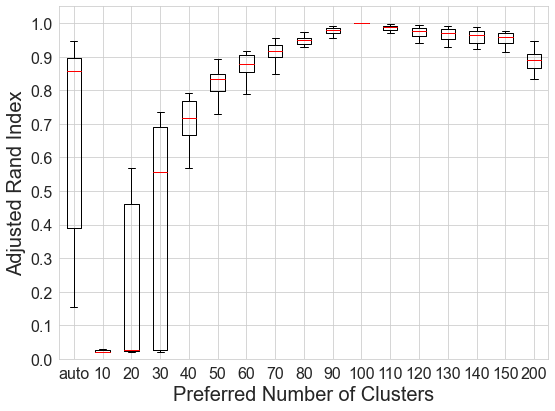

In [12]:
make_boxplot(dfs, 'Rand', 'Adjusted Rand Index', '../graphics/preferred_number_of_modules_rand_de.pdf')

### End

